In [1]:
import pandas as pd,os

In [3]:
import seaborn as  sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
print(os.listdir())

['.ipynb_checkpoints', 'Crop DataSet Analysis.ipynb', 'Crop Production data.csv']


In [6]:
data=pd.read_csv('C:/Users/ASUS/Downloads/Crop Production Analysis/Crop Production data.csv')

In [7]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [8]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [11]:
data.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [12]:
data['Season']=data['Season'].apply(lambda x : x.strip())
data['Crop']=data['Crop'].apply(lambda x : x.strip())
data['Crop']=data['State_Name'].apply(lambda x : x.strip())


In [13]:
data.Season.unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [14]:
data['Season'].value_counts()

Season
Kharif        94283
Rabi          66160
Whole Year    56127
Summer        14811
Winter         6050
Autumn         4930
Name: count, dtype: int64

In [15]:
data['Season']=data['Season'].apply(lambda x : x.replace('Autumn','Kharif'))
data['Season']=data['Season'].apply(lambda x : x.replace('Summer','Kharif'))
data['Season']=data['Season'].apply(lambda x : x.replace('Winter','Kharif'))

In [16]:
data['Season'].value_counts()

Season
Kharif        120074
Rabi           66160
Whole Year     56127
Name: count, dtype: int64

In [22]:
data.drop(data[data['Production']==0].index,inplace=True)

print(f'After removing the row which has 0 Production : {data.shape[0]}')

After removing the row which has 0 Production : 238838


In [20]:
data.Crop.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [23]:
data['Crop']=data['Crop'].apply(lambda x:x.replace('Kapas','Cotton(lint)')
                                      .replace('Cotton(lint)','Cotton'))

data.replace('Jute & mesta','Jute',inplace=True)
data.replace('Mesta','Jute',inplace=True)

In [24]:
data['Crop']=data['Crop'].apply(lambda x:x.replace('Other Kharif pulses','pulses')
                                    .replace('Other  Rabi pulses','pulses')
                                    .replace('Peas & beans (Pulses)','pulses')
                                    .replace('Pulses total','pulses')
                                    .replace('other misc. pulses','pulses')
                                    .replace('Moong(Green Gram)','pulses')
                                    .replace('Urad','pulses')
                                    .replace('Arhar/Tur','pulses')
                                    .replace('Bean','pulses')
                                    .replace('Ricebean (nagadal)','pulses')
                                    .replace('Lentil','pulses')
                                    .replace('Masoor','pulses')
                                    .replace('Khesari','pulses')
                                    .replace('Horse-gram','pulses')
                                    .replace('Rajmash Kholar','pulses'))

In [25]:
data['Crop']=data['Crop'].apply(lambda x:x
                                    .replace('Atcanut (Raw)','Arecanut')
                                    .replace('Arcanut (Processed)','Arecanut')
                                    .replace('Arecanut','Arecanut'))

In [26]:
data['Crop']=data['Crop'].apply(lambda x:x
                                    .replace('Black pepper','Other Spices')
                                    .replace('Cardamom','Other Spices')
                                    .replace('Perilla','Other Spices'))

In [27]:
data['Crop']=data['Crop'].apply(lambda x:x
                                    .replace('Papaya','Fruits')
                                    .replace('Mango','Fruits')
                                     .replace('Orange','Fruits')
                                     .replace('Other Fresh Fruits','Fruits')
                                     .replace('Pineapple','Fruits')
                                     .replace('Citrus Fruit','Fruits')
                                     .replace('Pome Fruit','Fruits')
                                     .replace('Pome Granet','Fruits')
                                     .replace('Grapes','Fruits')
                                     .replace('Jack Fruit','Fruits')
                                     .replace('Sapota','Fruits')
                                     .replace('Lemon','Fruits'))

In [28]:
data.shape

(238838, 7)

In [29]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 238838
Number of Columns 7


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238838 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     238838 non-null  object 
 1   District_Name  238838 non-null  object 
 2   Crop_Year      238838 non-null  int64  
 3   Season         238838 non-null  object 
 4   Crop           238838 non-null  object 
 5   Area           238838 non-null  float64
 6   Production     238838 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.6+ MB


In [31]:
data.isnull()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
246086,False,False,False,False,False,False,False
246087,False,False,False,False,False,False,False
246088,False,False,False,False,False,False,False
246089,False,False,False,False,False,False,False


In [32]:
data.describe()

,Crop_Year,Area,Production
count,238838.000000,2.388380e+05,2.388380e+05
mean,2005.676178,1.234239e+04,5.910957e+05
std,4.975472,5.120969e+04,1.719107e+07
min,1997.000000,1.000000e-01,1.000000e-02
25%,2002.000000,9.100000e+01,9.900000e+01
50%,2006.000000,6.340550e+02,7.840000e+02
75%,2010.000000,4.700000e+03,7.306270e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [40]:
data['Crop']=data['Crop'].apply(lambda x:x
                                    .replace('Papaya','Fruits')
                                    .replace('Mango','Fruits')
                                     .replace('Orange','Fruits')
                                     .replace('Other Fresh Fruits','Fruits')
                                     .replace('Pineapple','Fruits')
                                     .replace('Citrus Fruit','Fruits')
                                     .replace('Pome Fruit','Fruits')
                                     .replace('Pome Granet','Fruits')
                                     .replace('Grapes','Fruits')
                                     .replace('Jack Fruit','Fruits')
                                     .replace('Sapota','Fruits')
                                     .replace('Lemon','Fruits'))

In [41]:
data['Crop']=data['Crop'].apply(lambda x:x
                                    .replace('Ginger','Dry ginger'))

data['Crop']=data['Crop'].apply(lambda x:x
                                    .replace('Turnip','Onion'))

data['Crop']=data['Crop'].apply(lambda x:x
                                      .replace('Cashewnut Raw','Cashewnut')
                                      .replace('Cashewnut Processed','Cashewnut'))

In [42]:
data['Crop']=data['Crop'].apply(lambda x:x
                                      .replace('black gram','gram')
                                     .replace('Moth','gram')
                                     .replace('Blackgram','gram'))

In [43]:
data['Crop']=data['Crop'].apply(lambda x:x
                                      .replace('Oilseeds total' ,'other oilseeds')
                                      .replace('Niger seed' ,'other oilseeds'))

In [44]:
data['Crop']=data['Crop'].apply(lambda x:x
                                      .replace('Other Cereals & Millets' ,'Bajra')
                                      .replace('Samai' ,'Bajra')
                                      .replace('Small millets' ,'Bajra')
                                      .replace('Ragi','Bajra')
                                      .replace('Varagu','Bajra')
                                      .replace('Jobster','Bajra'))

In [45]:
data['Crop']=data['Crop'].apply(lambda x:x
                                     .replace('Coriander' ,'Other Vegetables')
                                     .replace('pulsess & Mutter(Vegetable)' ,'Other Vegetables')
                                     .replace('Bhindi' ,'Other Vegetables')
                                     .replace('Tomato','Other Vegetables')
                                     .replace('Cowpea(Lobia)','Other Vegetables')
                                     .replace('Cabbage','Other Vegetables')
                                     .replace('Carrot','Other Vegetables')
                                     .replace('Drum Stick','Other Vegetables')
                                     .replace('Redish','Other Vegetables')
                                     .replace('Cauliflower','Other Vegetables')
                                     .replace('Colocosia','Other Vegetables')
                                     .replace('Brinjal','Other Vegetables')
                                     .replace('Bottle Gourd','Other Vegetables')
                                     .replace('Bitter Gourd','Other Vegetables'))

In [47]:
data.drop(data[data['Crop']=='Tea'].index,inplace=True)
data.drop(data[data['Crop']=='Coffee'].index,inplace=True)
data.drop(data[data['Crop']=='Rubber'].index,inplace=True)
data.drop(data[data['Crop']=='Cond-spcs other'].index,inplace=True)

In [48]:
data.Crop.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [49]:
data


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,West Bengal,306.0,801.0
246087,West Bengal,PURULIA,2014,Kharif,West Bengal,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,West Bengal,324.0,16250.0
246089,West Bengal,PURULIA,2014,Kharif,West Bengal,279151.0,597899.0


In [50]:
data['Producation_area_factor']= data['Production'] / data['Area']

In [51]:
data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Producation_area_factor
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Kharif,West Bengal,306.0,801.0,2.617647
246087,West Bengal,PURULIA,2014,Kharif,West Bengal,627.0,463.0,0.738437
246088,West Bengal,PURULIA,2014,Whole Year,West Bengal,324.0,16250.0,50.154321
246089,West Bengal,PURULIA,2014,Kharif,West Bengal,279151.0,597899.0,2.141848


In [52]:
Q1 = data['Area'].quantile(0.25)
Q3 = data['Area'].quantile(0.75)
Q1, Q3

(91.0, 4700.0)

In [53]:
IQR = Q3 - Q1 

In [54]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-6822.5, 11613.5)

In [55]:
area_outlier = data[(data['Area'] < lower_limit) | (data['Area'] > upper_limit)]

In [56]:
area_outlier['Crop'].value_counts()

Crop
Uttar Pradesh                  5265
Madhya Pradesh                 4578
Maharashtra                    4279
Karnataka                      3708
Rajasthan                      2854
Bihar                          2255
Gujarat                        2104
Andhra Pradesh                 1808
Tamil Nadu                     1769
West Bengal                    1660
Telangana                      1380
Odisha                         1311
Assam                          1185
Haryana                        1090
Punjab                          933
Chhattisgarh                    809
Kerala                          562
Uttarakhand                     470
Himachal Pradesh                261
Jammu and Kashmir               254
Jharkhand                       152
Nagaland                        147
Tripura                          80
Manipur                          68
Meghalaya                        64
Arunachal Pradesh                64
Goa                              41
Sikkim                 

In [57]:
West_India= ['Maharashtra','Goa','Gujarat','Dadra and Nagar Haveli']
East_India= ['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Sikkim','Tripura','West Bengal','Bihar','Odisha','Jharkhand' ]
North_India=['Jammu and Kashmir ','Himachal Pradesh','Punjab','Uttarakhand','Haryana','Rajasthan','Uttar Pradesh','Chandigarh','Madhya Pradesh','Chhattisgarh']   # Delhi
South_India = ['Andhra Pradesh','Karnataka','Kerala','Tamil Nadu','Telangana','Puducherry']

In [59]:
zone = []

for df in data['State_Name']:
    if df in West_India:
         zone.append('West India')
    elif df in East_India:
         zone.append('EastIndia')
    elif df in North_India:
         zone.append('North India')
    elif df in South_India: 
         zone.append('South India')
    else:
          zone.append('Union Territory')

In [61]:
data['zone'] = zone

In [62]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Producation_area_factor,zone
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,1254.0,2000.0,1.594896,Union Territory
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,2.0,1.0,0.500000,Union Territory
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Andaman and Nicobar Islands,102.0,321.0,3.147059,Union Territory
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,176.0,641.0,3.642045,Union Territory
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Andaman and Nicobar Islands,720.0,165.0,0.229167,Union Territory


In [63]:
data['zone'].value_counts()

zone
North India        92770
EastIndia          71529
South India        47604
West India         21229
Union Territory     5706
Name: count, dtype: int64

In [64]:

data['Crop_Year'].value_counts()

Crop_Year
2003    15550
2002    15094
2007    14269
2008    14230
2006    13976
2004    13834
2010    13793
2011    13791
2009    13767
2005    13519
2013    13474
2000    13401
2012    13183
2001    13139
1999    12282
1998    11262
2014    10814
1997     8899
2015      561
Name: count, dtype: int64

In [66]:
data.drop(data[data['Crop_Year'] == 2015].index,inplace=True)

In [67]:
val=data.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=data.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

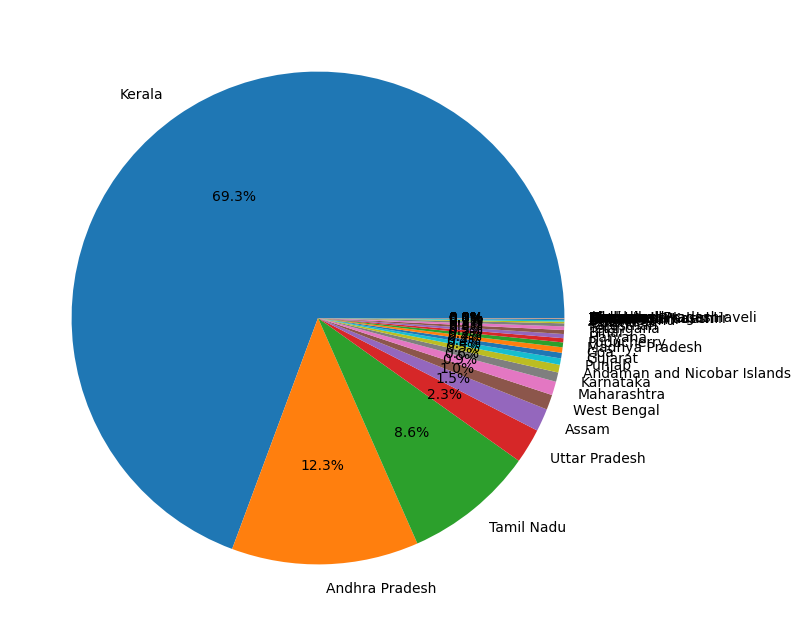

In [68]:
plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

In [69]:
coconut = data[data['Crop'] == 'Coconut']

coconut.to_csv('coconut.csv')

data.drop(data[data['Crop']=='Coconut'].index,inplace=True)

In [70]:
val=data.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=data.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

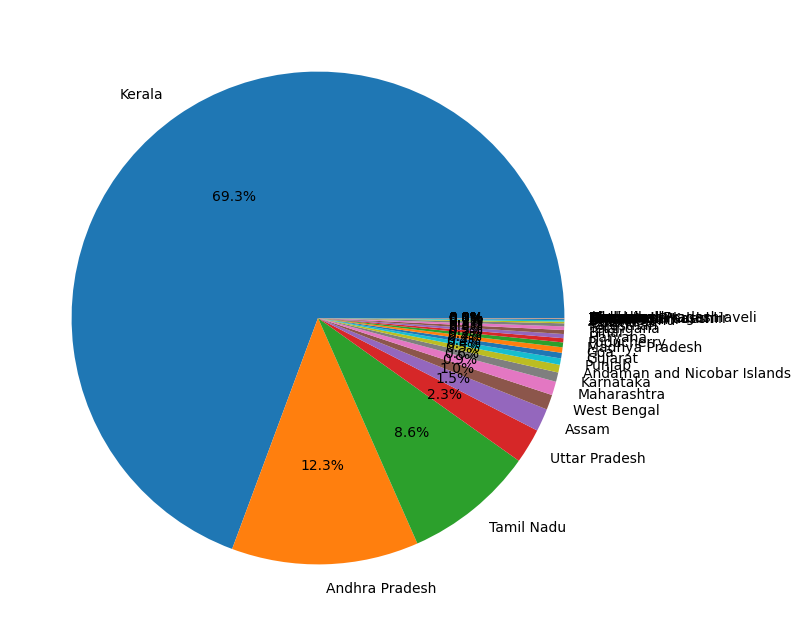

In [71]:
plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

**Conclusion**


In [72]:
# Since we have found out that number of outliers are almost approx 20% and 46000k in numbers so we can not remove these outliers
# to avoide loss of information and producation also depends types soil and area,availability of water to farmer
# so we dont have much information about these other factors so we cant not remove outliers on basis of Producation_area_factor  
# Producation_area_factor can not be same for all crops sinces this factors is hihh for coconut and very less for total_foodgrain
# so we cant not compare both on one scale
# we have observed that Production of coconut is more than 92% of total Production so we not able to visualize our dataset
# so we have decided to consider coconut as an outlier and we have removed it from dataset